In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np
import stockstats as ss

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV

import random

In [4]:
stock = ss.StockDataFrame.retype(pd.read_csv('../Data/AMZN.csv'))

In [56]:
def profitable(x):
    if x["change"] > 0:
        return 1
    elif x["change"] <= 0:
        return 0

In [57]:
stock['macd']
stock['volume_delta']
stock['open_-1_r']
stock['cr']
stock['cr-ma1']
stock['cr-ma2']
stock['cr-ma3']
stock["rsi_6"]
stock["rsi_12"]
stock["wr_10"]
stock["cci"]
stock['tr']
stock['atr']
stock['dma']
stock['pdi']
stock['mdi']
stock['dx']
stock['adx']
stock['adxr']
stock['trix']
stock['trix_9_sma']
stock['vr']

C:\Python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


date
2014-01-02          NaN
2014-01-03     0.000000
2014-01-06     0.000000
2014-01-07    35.588266
2014-01-08    78.607647
2014-01-09    56.526874
2014-01-10    41.623226
2014-01-13    32.521724
2014-01-14    50.500303
2014-01-15    41.881834
2014-01-16    35.925356
2014-01-17    60.564877
2014-01-21    77.629753
2014-01-22    69.741461
2014-01-23    60.720039
2014-01-24    50.900956
2014-01-27    44.597228
2014-01-28    53.706654
2014-01-29    48.527827
2014-01-30    79.448269
2014-01-31    54.453084
2014-02-03    45.374480
2014-02-04    53.185269
2014-02-05    49.616993
2014-02-06    54.665906
2014-02-07    61.236269
2014-02-10    58.200530
2014-02-11    64.896964
2014-02-12    61.756951
2014-02-13    64.954494
                ...    
2018-10-17    62.579267
2018-10-18    54.380626
2018-10-19    53.149443
2018-10-22    59.762570
2018-10-23    59.963612
2018-10-24    51.858106
2018-10-25    64.264656
2018-10-26    53.142359
2018-10-29    50.084683
2018-10-30    42.300197
2018-10-31 

In [59]:
stock

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,398.800,399.3600,394.020,397.97,2140246,397.970000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,398.290,402.7100,396.220,396.44,2213512,397.175577,-0.034327,-0.019071,-0.030513,73266.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,-0.061099,-0.061099,-0.384451,0.000000
2014-01-06,395.850,397.0000,388.420,393.63,3172207,395.901686,-0.130877,-0.064893,-0.131969,958695.0,...,45.748988,45.748988,68.353576,68.353576,81.539586,81.539586,-0.087229,-0.074164,-0.708808,0.000000
2014-01-07,395.040,398.4700,394.290,398.03,1916684,396.496669,-0.012722,-0.047220,0.068995,-1255523.0,...,25.811655,25.811655,49.229226,49.229226,67.014745,67.014745,-0.051927,-0.066752,1.117801,35.588266
2014-01-08,398.470,403.0000,396.040,401.92,2316903,397.754362,0.206541,0.028268,0.356546,400219.0,...,15.357935,15.357935,36.146059,36.146059,55.091368,55.091368,-0.007654,-0.051977,0.977313,78.607647
2014-01-09,403.710,406.8900,398.440,401.01,2103793,398.406440,0.295554,0.100717,0.389673,-213110.0,...,36.082116,36.082116,36.123616,36.123616,48.434216,48.434216,0.019412,-0.037699,-0.226413,56.526874
2014-01-10,402.530,403.7640,393.800,397.66,2681701,398.273690,0.195787,0.124777,0.142020,577908.0,...,1.783016,1.783016,24.809367,24.809367,40.650502,40.650502,0.026138,-0.027060,-0.835391,41.623226
2014-01-13,397.980,399.7800,388.450,390.98,2846507,397.098496,-0.191957,0.048660,-0.481234,164806.0,...,23.776572,23.776572,24.483356,24.483356,35.547195,35.547195,0.010446,-0.021702,-1.679827,32.521724
2014-01-14,392.130,398.6300,391.290,397.54,2340401,397.163936,-0.132077,0.006909,-0.277971,-506106.0,...,23.776572,23.776572,24.266740,24.266740,32.089943,32.089943,0.002998,-0.018614,1.677835,50.500303


In [60]:
stock_clean = stock

In [61]:
stock_clean["profitable"] = stock.apply(profitable, axis=1)

In [62]:
stock_clean

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,398.800,399.3600,394.020,397.97,2140246,397.970000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,398.290,402.7100,396.220,396.44,2213512,397.175577,-0.034327,-0.019071,-0.030513,73266.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,-0.061099,-0.061099,-0.384451,0.000000,0.0
2014-01-06,395.850,397.0000,388.420,393.63,3172207,395.901686,-0.130877,-0.064893,-0.131969,958695.0,...,45.748988,68.353576,68.353576,81.539586,81.539586,-0.087229,-0.074164,-0.708808,0.000000,0.0
2014-01-07,395.040,398.4700,394.290,398.03,1916684,396.496669,-0.012722,-0.047220,0.068995,-1255523.0,...,25.811655,49.229226,49.229226,67.014745,67.014745,-0.051927,-0.066752,1.117801,35.588266,1.0
2014-01-08,398.470,403.0000,396.040,401.92,2316903,397.754362,0.206541,0.028268,0.356546,400219.0,...,15.357935,36.146059,36.146059,55.091368,55.091368,-0.007654,-0.051977,0.977313,78.607647,1.0
2014-01-09,403.710,406.8900,398.440,401.01,2103793,398.406440,0.295554,0.100717,0.389673,-213110.0,...,36.082116,36.123616,36.123616,48.434216,48.434216,0.019412,-0.037699,-0.226413,56.526874,0.0
2014-01-10,402.530,403.7640,393.800,397.66,2681701,398.273690,0.195787,0.124777,0.142020,577908.0,...,1.783016,24.809367,24.809367,40.650502,40.650502,0.026138,-0.027060,-0.835391,41.623226,0.0
2014-01-13,397.980,399.7800,388.450,390.98,2846507,397.098496,-0.191957,0.048660,-0.481234,164806.0,...,23.776572,24.483356,24.483356,35.547195,35.547195,0.010446,-0.021702,-1.679827,32.521724,0.0
2014-01-14,392.130,398.6300,391.290,397.54,2340401,397.163936,-0.132077,0.006909,-0.277971,-506106.0,...,23.776572,24.266740,24.266740,32.089943,32.089943,0.002998,-0.018614,1.677835,50.500303,1.0


In [63]:
stock_clean["profitable"] = stock_clean["profitable"].shift(-1) #shifts "profitable" target column up 1 so current days stats predict tomorrow's profitability 

In [28]:
stock_clean.tail()

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2018-04-16,1445.00,1447.00,1427.48,1441.50,2808624,1460.923187,-19.188133,-16.850487,-4.675292,-876643.0,...,24.369291,25.302568,25.302568,29.182432,29.182432,-0.312559,-0.264471,0.748538,86.989961,1.0
2018-04-17,1462.30,1507.19,1457.02,1503.83,5114403,1464.101469,-12.813347,-16.043059,6.459425,2305779.0,...,28.614158,26.248737,26.248737,28.344233,28.344233,-0.284299,-0.282383,4.323968,87.664531,1.0
2018-04-18,1514.65,1533.80,1504.11,1527.84,5227509,1468.822842,-5.757508,-13.985949,16.456883,113106.0,...,41.358094,30.565696,30.565696,28.978937,28.978937,-0.238591,-0.288934,1.596590,87.726503,1.0
2018-04-19,1543.22,1568.52,1539.06,1556.91,6523728,1475.347816,2.155158,-10.757728,25.825772,1296219.0,...,53.780359,37.198457,37.198457,31.327371,31.327371,-0.177044,-0.283022,1.902686,103.145788,0.0
2018-04-20,1561.20,1561.20,1516.09,1527.49,5541622,1479.210200,5.983086,-7.409565,26.785302,-982106.0,...,32.374772,35.820261,35.820261,32.611054,32.611054,-0.116296,-0.265590,-1.889640,91.411836,NaN


In [64]:
stock_clean = stock_clean[:len(stock_clean.index)-1] #removes last entry that now has NaN "profitable" column

In [30]:
stock_clean

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,908.680,909.9900,903.8200,907.41,3122893,907.410000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2017-04-25,907.040,909.4800,903.0000,907.62,3380639,907.519038,0.004712,0.002618,0.004188,257746.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,0.003678,0.003678,0.023143,inf,1.0
2017-04-26,910.300,915.7490,907.5600,909.29,2608948,908.155328,0.057790,0.025229,0.065122,-771691.0,...,79.636086,88.121050,88.121050,93.070613,93.070613,0.013662,0.008670,0.183998,inf,1.0
2017-04-27,914.390,921.8600,912.1100,918.38,5305543,911.013699,0.408706,0.155133,0.507145,2696595.0,...,89.869920,88.907239,88.907239,91.199004,91.199004,0.046934,0.021425,0.999681,inf,1.0
2017-04-28,948.830,949.5900,924.3335,924.99,7364681,914.254861,0.853811,0.362974,0.981674,2059138.0,...,97.210307,92.114393,92.114393,91.552583,91.552583,0.077972,0.035562,0.719746,inf,1.0
2017-05-01,927.800,954.4000,927.8000,948.23,5466544,921.059810,2.099087,0.833557,2.531059,-1898137.0,...,97.563645,94.026928,94.026928,92.421009,92.421009,0.132412,0.054932,2.512460,inf,0.0
2017-05-02,946.645,950.1000,941.4130,946.94,3848835,925.662468,2.803099,1.331996,2.942207,-1617709.0,...,97.563645,95.192176,95.192176,93.334030,93.334030,0.172967,0.074604,-0.136043,626.848254,0.0
2017-05-03,946.000,946.0000,935.9000,941.03,3582686,928.138558,2.949013,1.720595,2.456834,-266149.0,...,65.564437,85.839909,85.839909,90.968442,90.968442,0.192956,0.091512,-0.624116,324.648951,0.0
2017-05-04,944.750,945.0000,934.2150,937.53,2418381,929.530576,2.831536,1.977228,1.708617,-1164305.0,...,56.618320,76.884030,76.884030,86.651829,86.651829,0.197855,0.104805,-0.371933,244.940051,0.0


In [65]:
stock_clean = stock_clean[1:].dropna() #removes all rows containing any NaN values

In [32]:
stock_clean

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,volume_delta,...,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,change,vr,profitable
date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,940.95,949.0500,939.2100,949.04,3415731,932.615714,3.074860,2.314647,1.520427,549334.0,...,51.684038,60.953133,60.953133,74.437593,74.437593,0.191673,0.135411,1.593962,216.588852,1.0
2017-05-09,952.80,957.8900,950.2000,952.82,3262113,935.098129,3.638001,2.598848,2.078306,-153618.0,...,62.568973,61.426491,61.426491,70.626012,70.626012,0.194307,0.155483,0.398297,242.241858,0.0
2017-05-10,953.50,953.7499,945.0000,948.95,2096512,936.720873,3.788773,2.850677,1.876191,-1165601.0,...,41.007587,55.487768,55.487768,66.223139,66.223139,0.194739,0.171905,-0.406163,207.956471,0.0
2017-05-11,945.11,950.2900,940.7750,947.62,2194070,937.944975,3.775337,3.044117,1.462441,97558.0,...,25.413672,46.785530,46.785530,60.598674,60.598674,0.192245,0.184602,-0.140155,181.127856,1.0
2017-05-12,954.50,962.7900,951.5300,961.35,3625857,940.476825,4.531796,3.352503,2.358585,1431787.0,...,45.854766,46.517182,46.517182,56.538855,56.538855,0.194476,0.191498,1.448893,202.447797,0.0
2017-05-15,958.73,963.1500,956.0550,957.97,4270625,942.306755,4.843836,3.659408,2.368855,644768.0,...,46.343427,46.467217,46.467217,53.642627,53.642627,0.196324,0.194093,-0.351589,161.814340,1.0
2017-05-16,961.00,970.0600,960.9100,966.07,3126051,944.718932,5.522963,4.040705,2.964516,-1144574.0,...,55.281754,48.997273,48.997273,52.309261,52.309261,0.200679,0.194951,0.845538,176.506152,0.0
2017-05-17,954.70,960.3957,944.1200,944.76,5145578,944.722990,4.631672,4.161067,0.941210,2019527.0,...,5.846999,36.628057,36.628057,47.814175,47.814175,0.195389,0.194677,-2.205844,142.133700,1.0
2017-05-18,944.80,962.7500,944.7600,958.49,3939347,946.050329,4.771133,4.284864,0.972537,-1206231.0,...,10.459036,29.133637,29.133637,42.464346,42.464346,0.190431,0.194473,1.453279,157.042433,1.0


In [66]:
y = stock_clean["profitable"]
x = stock_clean.drop(["profitable", "change"], axis=1)
x_std = (x - x.mean())/x.std()

In [67]:
x_std = x_std.drop(["open","high","low","close","volume"], axis=1)

In [37]:
x_std

,close_26_ema,macd,macds,macdh,volume_delta,open_-1_r,middle,cr,cr-ma1,cr-ma2,...,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma,vr
date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,-1.015418,-0.592782,-0.689298,0.152691,0.275231,-0.102905,-1.000428,1.937283,6.888893,4.518116,...,-1.086278,0.764450,0.764450,1.548788,1.548788,2.562180,2.562180,-0.031349,-0.298331,1.584434
2017-05-09,-1.002383,-0.565686,-0.674565,0.196289,-0.087016,0.609743,-0.962464,2.418704,6.335856,4.720588,...,-1.194197,1.249884,1.249884,1.576847,1.576847,2.312489,2.312489,-0.020991,-0.214400,2.061578
2017-05-10,-0.993862,-0.558432,-0.661510,0.180494,-0.608512,-0.086611,-0.983706,1.559655,3.853013,4.362783,...,-0.717350,0.288314,0.288314,1.224817,1.224817,2.024063,2.024063,-0.019293,-0.145728,1.423873
2017-05-11,-0.987434,-0.559078,-0.651482,0.148160,0.042421,-0.646434,-0.998201,1.010207,2.623896,3.996616,...,-0.410605,-0.407125,-0.407125,0.708975,0.708975,1.655613,1.655613,-0.029100,-0.092635,0.924863
2017-05-12,-0.974139,-0.522681,-0.635496,0.218192,0.729977,0.453648,-0.938731,1.459793,1.675264,3.637261,...,-0.678365,0.504483,0.504483,0.693068,0.693068,1.389660,1.389660,-0.020325,-0.063799,1.321412
2017-05-15,-0.964530,-0.507667,-0.619586,0.218995,0.324410,0.130473,-0.936311,1.419961,1.378493,3.388059,...,-0.816730,0.526276,0.526276,0.690106,0.690106,1.199932,1.199932,-0.013060,-0.052947,0.565633
2017-05-16,-0.951864,-0.474990,-0.599820,0.265545,-0.597676,0.009280,-0.904369,1.705399,1.171638,3.642378,...,-0.986569,0.924897,0.924897,0.840080,0.840080,1.112586,1.112586,0.004062,-0.049359,0.838899
2017-05-17,-0.951842,-0.517875,-0.593581,0.107426,1.032852,-0.514697,-0.981172,0.645570,1.183522,3.612575,...,0.468101,-1.279737,-1.279737,0.106871,0.106871,0.818119,0.818119,-0.016737,-0.050506,0.199575
2017-05-18,-0.944873,-0.511165,-0.587163,0.109874,-0.629449,-0.738659,-0.954280,0.707719,1.103945,3.271691,...,0.046189,-1.074055,-1.074055,-0.337376,-0.337376,0.467660,0.467660,-0.036231,-0.051358,0.476876


In [68]:
import random
RANDOM_STATE = 123
random.seed(RANDOM_STATE)
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size = .3,random_state = RANDOM_STATE)

Accuracy Score: 0.434783


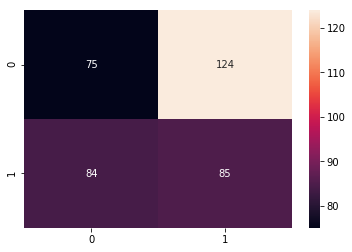

In [75]:
clf_rf = RandomForestClassifier(random_state = RANDOM_STATE)
clr_rf = clf_rf.fit(x_train,y_train)

predictions = clf_rf.predict(x_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')

In [70]:
f1 = f1_score(predictions, y_test)

In [71]:
f1

0.44973544973544977

In [72]:
params = {'n_estimators':range(150,301,10),
          'min_samples_leaf':range(1,5),
          'max_features':range(10,30,2)
          }
rf_model = GridSearchCV(clf_rf, param_grid=params, n_jobs=-1, verbose=True)
rf_model = rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 20.3min finished


In [73]:
rf_model.best_params_

{'max_features': 14, 'min_samples_leaf': 4, 'n_estimators': 280}

In [45]:
rf_model.best_params_

{'max_features': 22, 'min_samples_leaf': 1, 'n_estimators': 200}

Accuracy Score: 0.494565


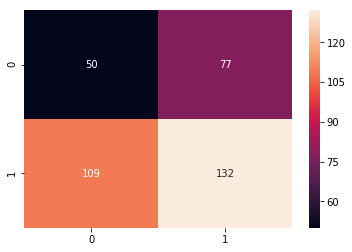

In [74]:
predictions = rf_model.predict(x_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')

In [76]:
x_train_30,x_test_30,y_train_30,y_test_30 = train_test_split(x_std[:81],y[:81],test_size = .3,random_state = RANDOM_STATE)

Accuracy Score: 0.434783


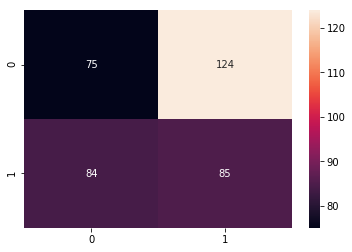

In [77]:
clf_rf_30 = RandomForestClassifier(random_state = RANDOM_STATE)
clr_rf_30 = clf_rf.fit(x_train,y_train)

predictions_30 = clf_rf.predict(x_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')